In [6]:
%run calc_functions.ipynb
%matplotlib inline

import plothist as ph
import numpy as np
import pandas as pd
#import scipy as sci
#import sympy as sym
#import statistics as stat
import random as rng
#import itertools as ite
#import time
import math
#------------------
import matplotlib.pyplot as plt
#import matplotlib.animation as manim
import matplotlib_inline
#from matplotlib.ticker import AutoMinorLocator
#import cartopy.crs as ccr
#from cartopy.io.img_tiles import GoogleTiles
#import timeit
#import Ipython.display
#from IPython.display import display
from mpl_toolkits import mplot3d
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator, MaxNLocator

#---------
#import json
import os
#import gc
#import sys
#----------
#import awkward as ak
#import uproot
#import vector
pd.options.display.max_columns = None
df_chg = pd.read_pickle('DlKKs_chgMC_df.p')
df_mix = pd.read_pickle('DlKKs_mixMC_df.p')
df_cc = pd.read_pickle('DlKKs_ccMC_df.p')
df_uds = pd.read_pickle('DlKKs_udsMC_df.p')
df_off = pd.read_pickle('DlKKs_off_df.p')
df_dat = pd.read_pickle('DlKKs_data_df.p')



df_cc2 = pd.read_pickle('for_Thomas/DlKKs_ccMC_df.p')
df_chg2 = pd.read_pickle('for_Thomas/DlKKs_chgMC_df.p')
df_mix2 = pd.read_pickle('for_Thomas/DlKKs_mixMC_df.p')
df_dat2 = pd.read_pickle('for_Thomas/DlKKs_data_df.p')

datasmc = [df_chg,df_mix,df_cc,df_uds]
df_names = [r"$B^+B^-$", r"$B^0\bar{B}^0$", r"$c\bar{c}$", r"light $q\bar{q}$ ($u,d,s$)", r"off-resonance"]
datasmc_old = [df_chg2,df_mix2,df_cc2]

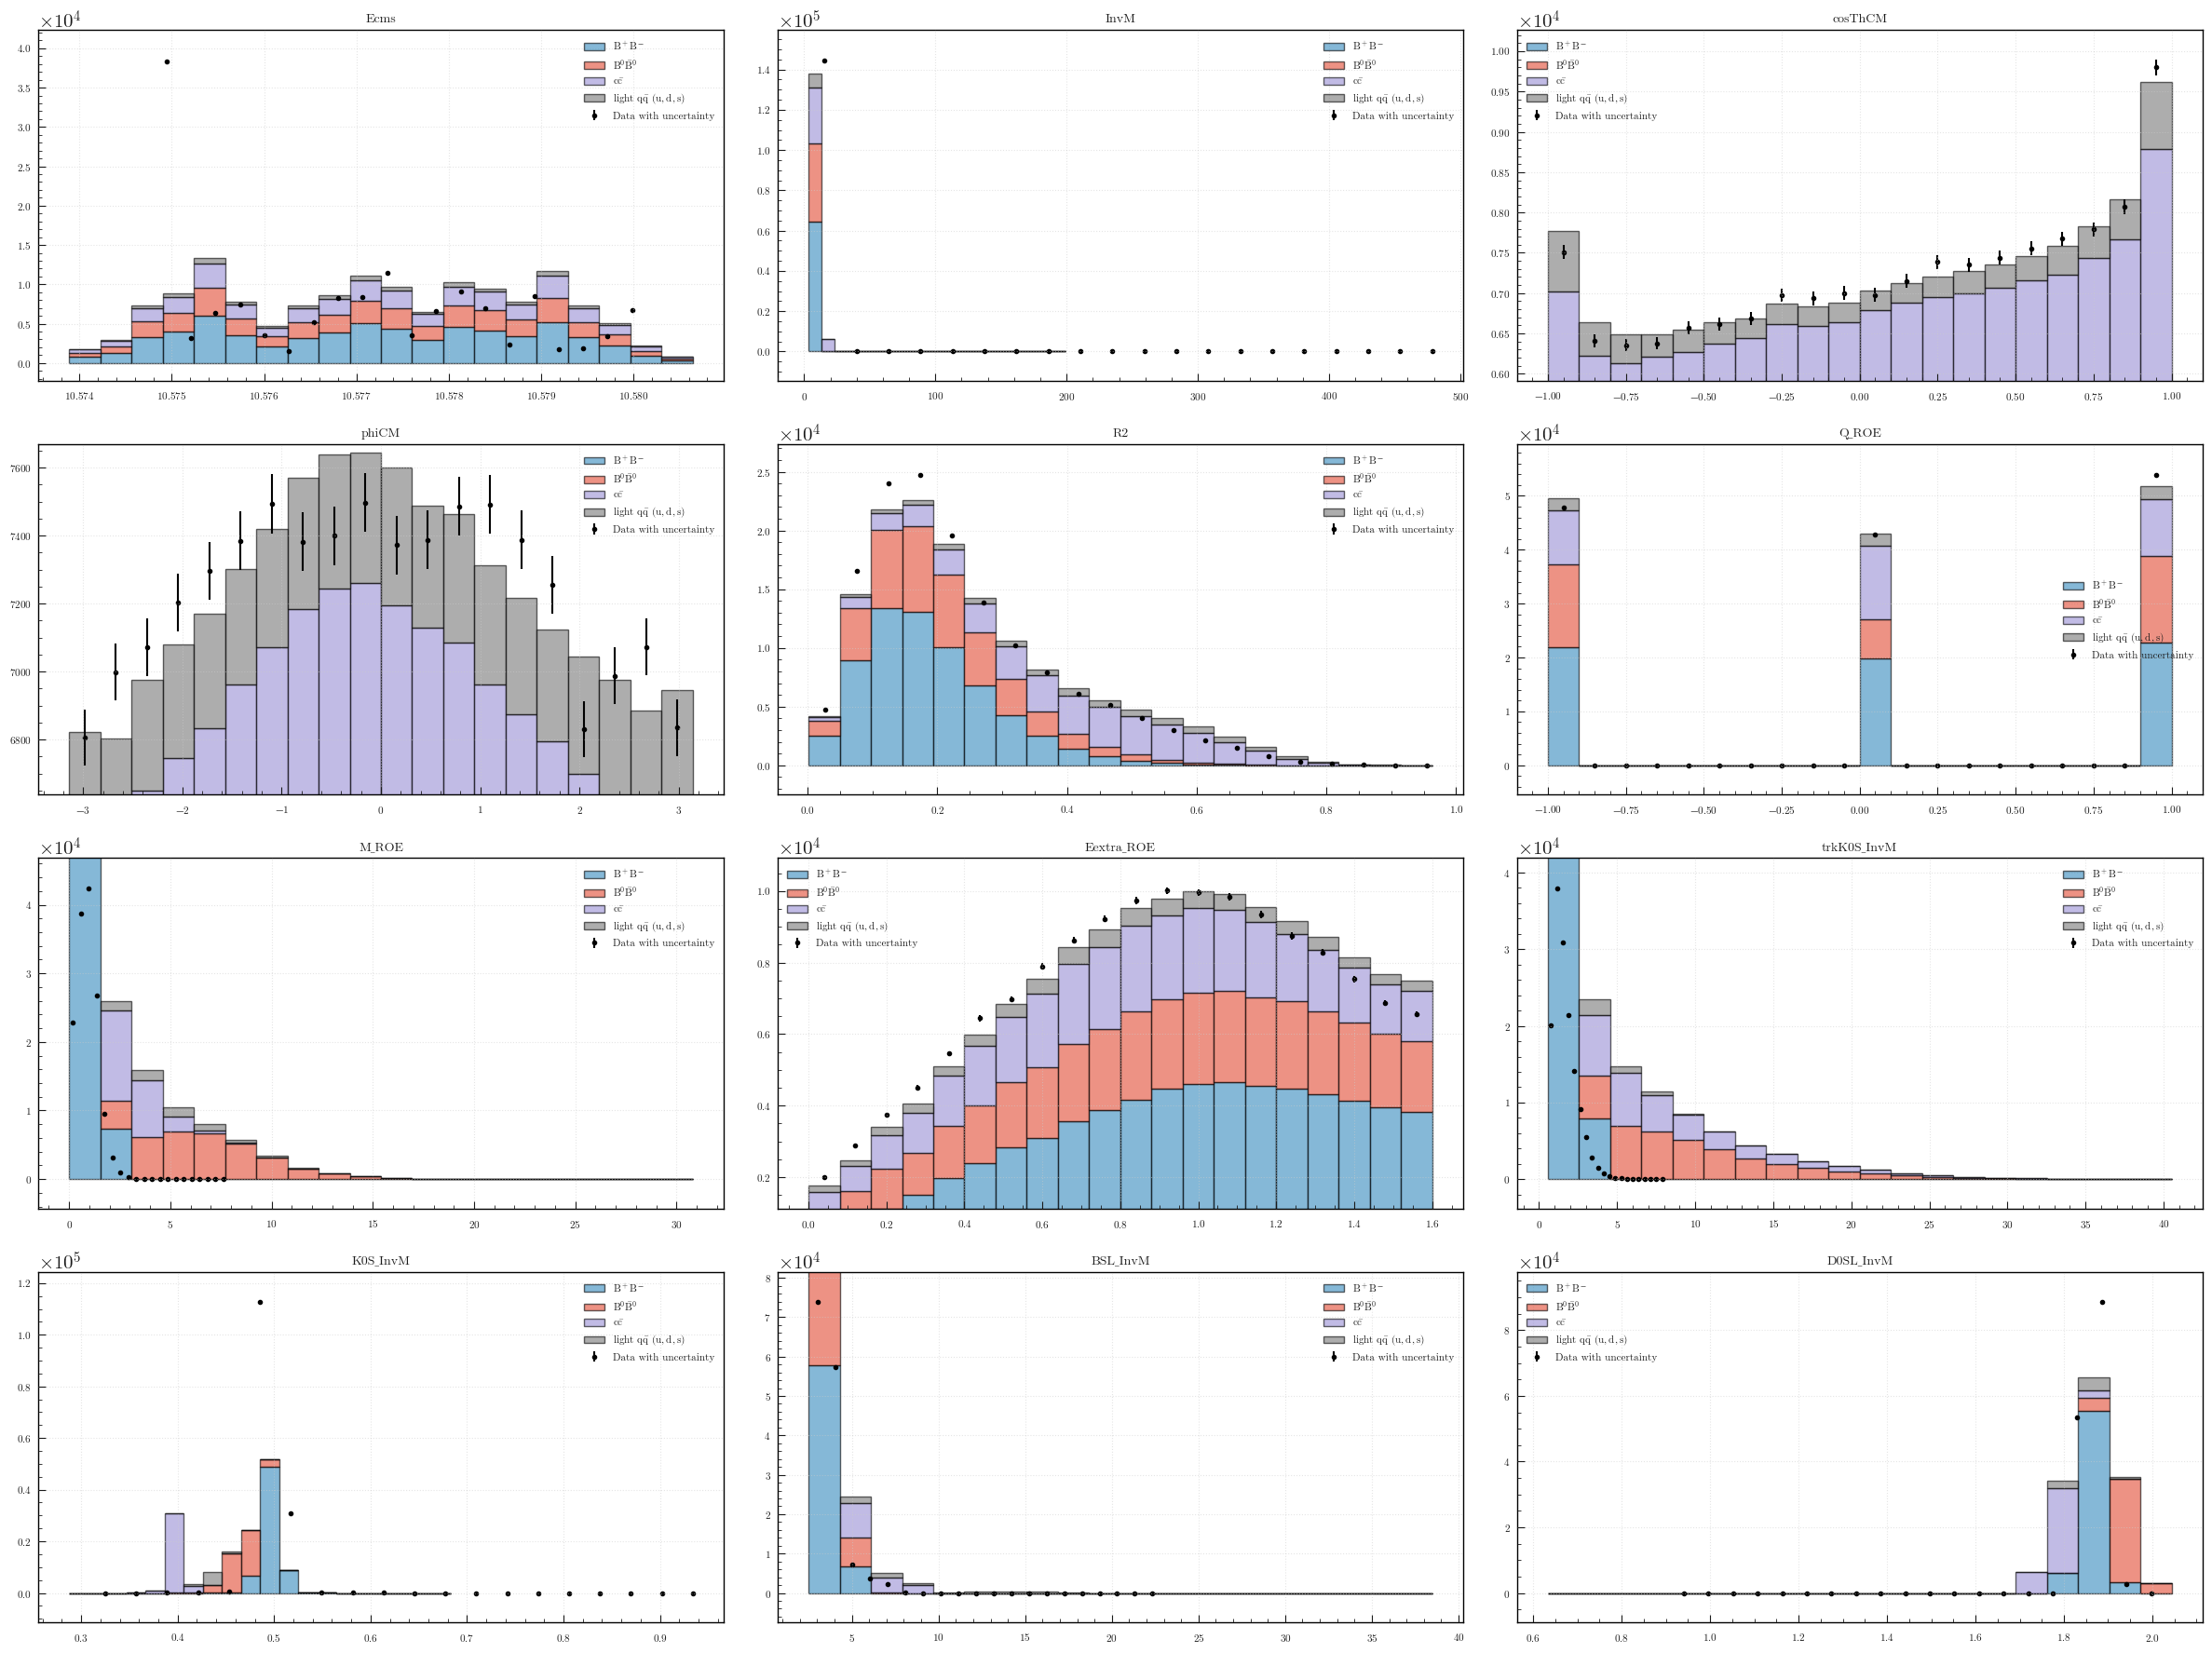

                                     Column Names (Total: 328)                                      


In [8]:



'''
The last one is from e+e-  qqbar, where q is u, d, or s.

 

The normalization factors are:

 

Data lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740

Generic MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029

Note that the chgMC luminosity is a bit lower: one grid job kept failing, so we only ran over 325/326 files successfully.
3.99 more data 
'''





def plot_data_mc_stacked(df_data, mc_dfs, mc_labels, cols, bins=20, figsize_per_plot=(5,4)):
    """
    Plot data (points with error bars) and stacked MC histograms from multiple MC samples.
    
    Args:
        df_data (pd.DataFrame): Data sample
        mc_dfs (list of pd.DataFrame): List of MC dataframes (each a different MC source)
        mc_labels (list of str): Labels for each MC source
        cols (list of str): List of observables to plot
        bins (int): Histogram bins
        figsize_per_plot (tuple): Size per subplot (width, height)
    """
    n = len(cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    figsize = (24,18)
    
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    
    for i, col in enumerate(cols):
        ax = axs[i]
        
        data_vals = df_data[col].dropna()
        data_weights = np.ones(len(data_vals))
        data_hist = ph.make_hist(data_vals, bins=bins, weights=data_weights)
        
        mc_hists = []
        for df_mc in mc_dfs:
            vals = df_mc[col].dropna()
            weights = np.full(len(vals), 0.25)
            mc_hists.append(ph.make_hist(vals, bins=bins, weights=weights))
        
        cumulative = np.zeros_like(mc_hists[0].values())
        bin_edges = mc_hists[0].axes[0].edges
        bin_centers = mc_hists[0].axes[0].centers
        
        for hist, label in zip(mc_hists, mc_labels):
            values = hist.values()
            ax.bar(
                bin_centers, values, 
                width=np.diff(bin_edges), bottom=cumulative, 
                label=label, alpha=0.6, align='center', edgecolor='black'
            )
            cumulative += values
        
        centers = data_hist.axes[0].centers

        
        ph.plot_error_hist(data_hist, ax=ax, color='black', label='Data with uncertainty')
        bin_values = data_hist.values()
        errors = np.sqrt(bin_values)



        bin_centers = data_hist.axes[0].centers
        bin_values = data_hist.values()
        
        y_min = np.min(bin_values - errors)
        y_max = np.max(bin_values + errors)
        y_range = y_max - y_min
        ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)


        
        ax.set_title(col, fontsize=10)
        ax.grid(True, linestyle=':', alpha=0.5)
        ax.legend(fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Hide unused axes
    for j in range(i+1, len(axs)):
        axs[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return fig, axs




observables = ['Ecms', 'InvM', 'cosThCM', 'phiCM', 'R2', 'Q_ROE', 'M_ROE', 'Eextra_ROE', 'trkK0S_InvM', 'K0S_InvM', 'BSL_InvM','D0SL_InvM']

plot_data_mc_stacked(df_dat, datasmc, df_names, cols=observables, bins=20)





observables = ['Ecms', 'InvM', 'cosThCM', 'phiCM', 'R2', 'Q_ROE', 'M_ROE', 'Eextra_ROE', 'trkK0S_InvM', 'K0S_InvM', 'BSL_InvM','D0SL_InvM']

columns = df_dat.columns
columns = list(columns) 

columns_per_row = 4

columns.sort()


print(f"{'Column Names (Total: ' + str(len(columns)) + ')':^100}")
print("=" * 100)

for i in range(0, len(columns), columns_per_row):
    row = columns[i:i + columns_per_row]


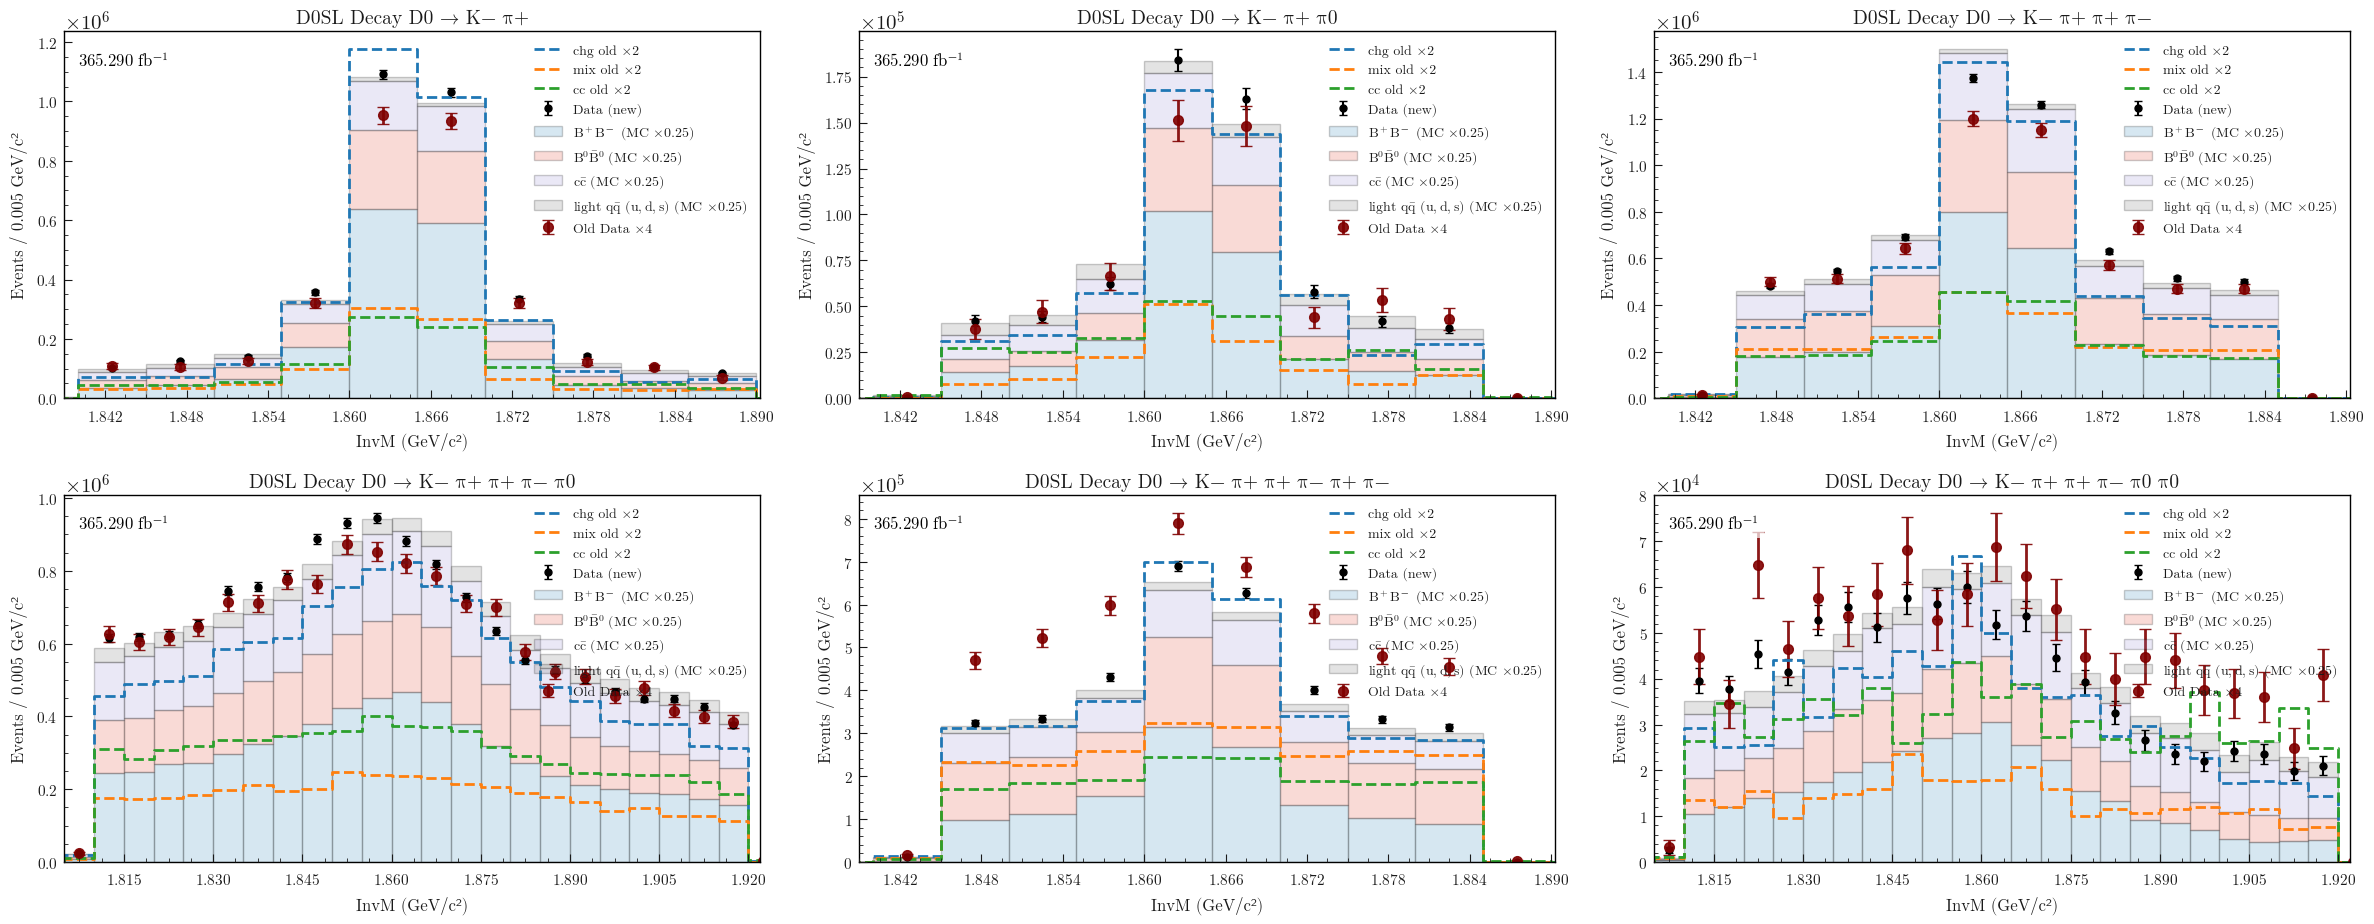

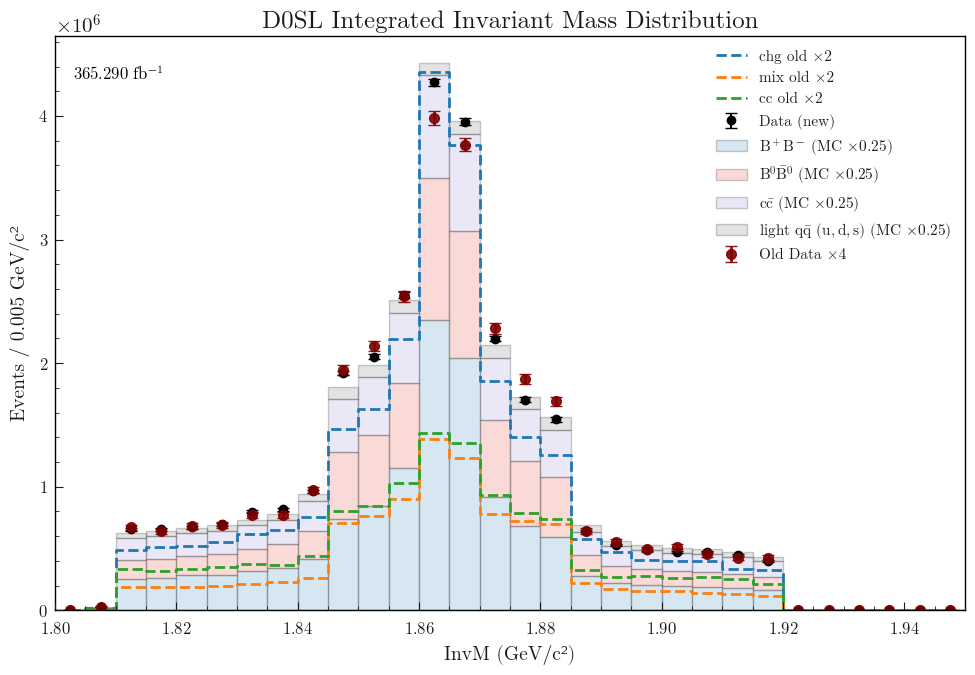

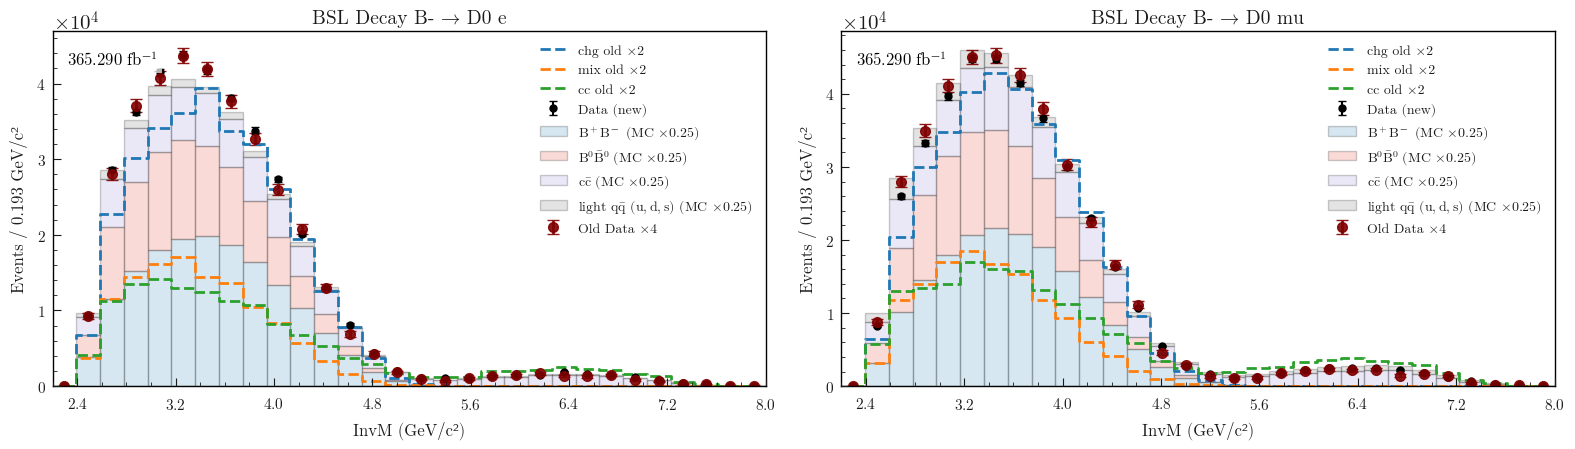

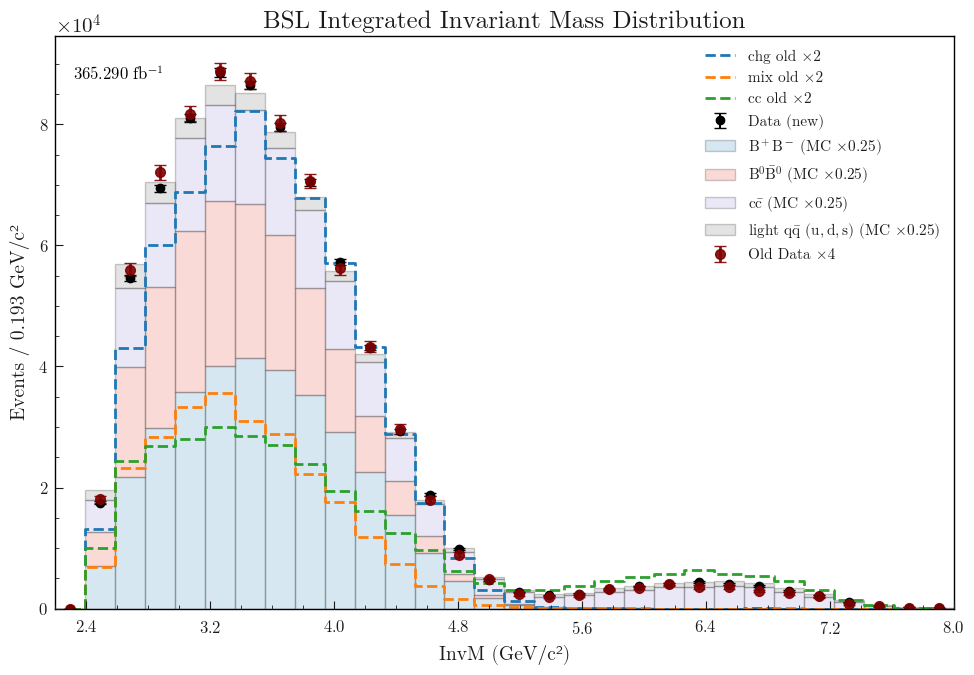

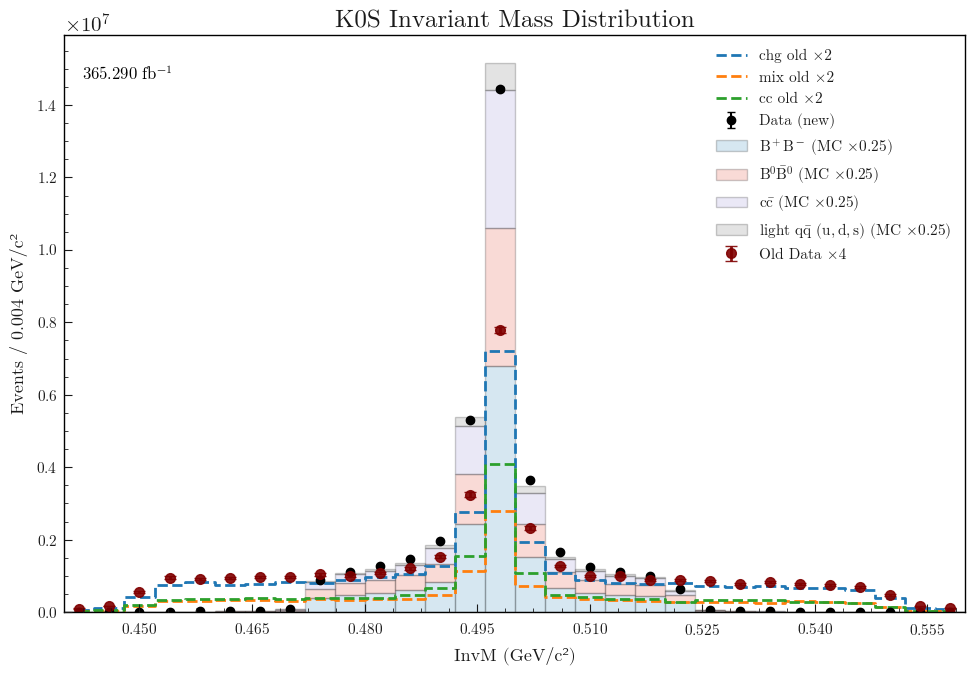

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator



def add_belle2_lumi_label(ax, lumi=365.290, pos=(0.02, 0.95)):
    label = f'${lumi:.3f}\\ \\mathrm{{fb}}^{{-1}}$'
    ax.text(pos[0], pos[1], label, transform=ax.transAxes, fontsize=12,
            fontweight='bold', verticalalignment='top', color='black',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))


def plot_inv_mass_by_decay(df_data, datas, particle, quantity, filtarg, bin_c, bin_range, df_names,
                           df_data_old=None, datas_old=None, df_names_old=None):
    colname = f"{particle}_{quantity}"
    id_col = f"{particle}_{filtarg}"
    ids = sorted(df_data[id_col].dropna().unique().astype(int))
    n_ids = len(ids)
    ncols = 3 if n_ids > 2 else n_ids
    nrows = int(np.ceil(n_ids / ncols))

    edges = np.linspace(*bin_range, bin_c + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    bin_width = edges[1] - edges[0]
    

    fig, axs = plt.subplots(nrows, ncols, figsize=(8 * ncols, 5 * nrows), squeeze=False)
    axs = axs.flatten()

    if datas_old is not None and df_names_old is not None:
        order = ['chg old', 'mix old', 'cc old']
        ordered_datas_old = []
        ordered_names_old = []
        for name in order:
            for d, n in zip(datas_old, df_names_old):
                if n == name:
                    ordered_datas_old.append(d)
                    ordered_names_old.append(n)
        datas_old = ordered_datas_old
        df_names_old = ordered_names_old

    old_mc_colors = {'chg old': 'tab:blue', 'mix old': 'tab:orange', 'cc old': 'tab:green'}

    for i, decay_id in enumerate(ids):
        ax = axs[i]
        data_sel = df_data[df_data[id_col] == decay_id][colname].dropna()
        data_counts, _ = np.histogram(data_sel, bins=edges)
        data_err = np.sqrt(data_counts)

        data_counts = data_counts / bin_width
        data_err = data_err / bin_width

        ax.errorbar(centers, data_counts, yerr=data_err, fmt='o', color='black', label='Data (new)', 
                    markersize=5, elinewidth=1.5, capsize=3)

        cumulative = np.zeros_like(data_counts, dtype=float)
        for df_mc, label in zip(datas, df_names):
            mc_sel = df_mc[df_mc[id_col] == decay_id][colname].dropna()
            mc_counts, _ = np.histogram(mc_sel, bins=edges)
            mc_counts = mc_counts.astype(float) * 0.25
            mc_counts = mc_counts / bin_width
            ax.bar(centers, mc_counts, width=bin_width, bottom=cumulative,
                   label=label + ' (MC ×0.25)', alpha=0.2, edgecolor='black')
            cumulative += mc_counts

        if df_data_old is not None:
            old_data_sel = df_data_old[df_data_old[id_col] == decay_id][colname].dropna()
            old_data_counts, _ = np.histogram(old_data_sel, bins=edges)
            old_data_err = np.sqrt(old_data_counts)
            old_data_counts = old_data_counts * 4 / bin_width
            old_data_err = old_data_err * 4 / bin_width
            ax.errorbar(centers, old_data_counts, yerr=old_data_err, fmt='o', color='maroon',
                        label='Old Data ×4', alpha=0.9, markersize=7, elinewidth=2, capsize=4)

        if datas_old is not None and df_names_old is not None:
            for df_mc_old, label_old in zip(datas_old, df_names_old):
                mc_sel_old = df_mc_old[df_mc_old[id_col] == decay_id][colname].dropna()
                mc_counts_old, _ = np.histogram(mc_sel_old, bins=edges)
                mc_counts_old = mc_counts_old * 2 / bin_width
                color = old_mc_colors.get(label_old, 'black')
                ax.step(centers, mc_counts_old, where='mid', label=f'{label_old} ×2',
                        linestyle='--', linewidth=2, color=color)

        if decay_id in [1, 2, 3, 5]:
            ax.set_xlim(1.839, 1.89)
            ticks = np.arange(1.839, 1.891 + 0.001, 0.0057)
            ax.set_xticks(ticks)
        elif decay_id in [4, 6]:
            ax.set_xlim(1.805, 1.922)
            ticks = np.arange(1.805, 1.922 + 0.001, 0.0117)
            ax.set_xticks(ticks)
        else:
            ax.set_xlim(*bin_range)

        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.xaxis.set_major_locator(MaxNLocator(nbins='auto'))
        decay_mode_labels = {
            1: "D0 → K− π+",
            2: "D0 → K− π+ π0",
            3: "D0 → K− π+ π+ π−",
            4: "D0 → K− π+ π+ π− π0",
            5: "D0 → K− π+ π+ π− π+ π−",
            6: "D0 → K− π+ π+ π− π0 π0",
            400: "B- → D0 e",
            401: "B- → D0 mu",
        }


        ax.set_title(f'{particle} Decay {decay_mode_labels[decay_id]}', fontsize=14, fontweight='bold')##############################################################
        ax.set_xlabel(f'{quantity} (GeV/c²)', fontsize=12)
        ax.set_ylabel(f'Events / {bin_width:.3f} GeV/c²', fontsize=12)
        ax.tick_params(axis='both', labelsize=11)

        ax.legend(fontsize=10, frameon=False)
        add_belle2_lumi_label(ax, lumi=365.290)

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def plot_inv_mass_combined(df_data, datas, particle, quantity, filtarg, bin_c, bin_range, df_names,
                           df_data_old=None, datas_old=None, df_names_old=None):
    colname = f"{particle}_{quantity}"
    edges = np.linspace(*bin_range, bin_c + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    bin_width = edges[1] - edges[0]

    data_sel = df_data[colname].dropna()
    data_counts, _ = np.histogram(data_sel, bins=edges)
    data_err = np.sqrt(data_counts)

    data_counts = data_counts / bin_width
    data_err = data_err / bin_width

    fig, ax = plt.subplots(figsize=(10, 7))

    ax.errorbar(centers, data_counts, yerr=data_err, fmt='o', color='black',
                label='Data (new)', markersize=6, elinewidth=1.5, capsize=4)

    cumulative = np.zeros_like(data_counts, dtype=float)
    for df_mc, label in zip(datas, df_names):
        mc_sel = df_mc[colname].dropna()
        mc_counts, _ = np.histogram(mc_sel, bins=edges)
        mc_counts = mc_counts.astype(float) * 0.25
        mc_counts = mc_counts / bin_width
        ax.bar(centers, mc_counts, width=bin_width, bottom=cumulative,
               label=label + ' (MC ×0.25)', alpha=0.2, edgecolor='black')
        cumulative += mc_counts

    if df_data_old is not None:
        old_data_sel = df_data_old[colname].dropna()
        old_data_counts, _ = np.histogram(old_data_sel, bins=edges)
        old_data_err = np.sqrt(old_data_counts)
        old_data_counts = old_data_counts * 4 / bin_width
        old_data_err = old_data_err * 4 / bin_width
        ax.errorbar(centers, old_data_counts, yerr=old_data_err, fmt='o', color='maroon',
                    label='Old Data ×4', alpha=0.9, markersize=7, elinewidth=2, capsize=4)

    if datas_old is not None and df_names_old is not None:
        old_mc_colors = {'chg old': 'tab:blue', 'mix old': 'tab:orange', 'cc old': 'tab:green'}
        for df_mc_old, label_old in zip(datas_old, df_names_old):
            mc_sel_old = df_mc_old[colname].dropna()
            mc_counts_old, _ = np.histogram(mc_sel_old, bins=edges)
            mc_counts_old = mc_counts_old * 2 / bin_width
            color = old_mc_colors.get(label_old, 'black')
            ax.step(centers, mc_counts_old, where='mid', label=f'{label_old} ×2',
                    linestyle='--', linewidth=2, color=color)

    ax.set_xlim(*bin_range)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto'))

    ax.set_xlabel(f'{quantity} (GeV/c²)', fontsize=14)
    ax.set_ylabel(f'Events / {bin_width:.3f} GeV/c²', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_title(f'{particle} Integrated Invariant Mass Distribution', fontsize=18, fontweight='bold')
    ax.legend(fontsize=11, frameon=False)

    add_belle2_lumi_label(ax, lumi=365.290)

    plt.tight_layout()
    plt.show()


def plot_k0s_inv_mass_combined(df_data, datas, particle, quantity, bin_c, bin_range, df_names,
                               df_data_old=None, datas_old=None, df_names_old=None):
    colname = f"{particle}_{quantity}"
    edges = np.linspace(*bin_range, bin_c + 1)
    centers = 0.5 * (edges[:-1] + edges[1:])
    bin_width = edges[1] - edges[0]

    data_vals = df_data[colname].dropna()
    data_counts, _ = np.histogram(data_vals, bins=edges)
    data_err = np.sqrt(data_counts)

    data_counts = data_counts / bin_width
    data_err = data_err / bin_width

    fig, ax = plt.subplots(figsize=(10, 7))

    ax.errorbar(centers, data_counts, yerr=data_err, fmt='o', color='black', label='Data (new)',
                markersize=6, elinewidth=1.5, capsize=3)

    cumulative = np.zeros_like(data_counts, dtype=float)
    for df_mc, label in zip(datas, df_names):
        mc_vals = df_mc[colname].dropna()
        mc_counts, _ = np.histogram(mc_vals, bins=edges)
        mc_counts = mc_counts.astype(float) * 0.25
        mc_counts = mc_counts / bin_width
        ax.bar(centers, mc_counts, width=bin_width, bottom=cumulative,
               label=f'{label} (MC ×0.25)', alpha=0.2, edgecolor='black')
        cumulative += mc_counts

    if df_data_old is not None:
        old_data_vals = df_data_old[colname].dropna()
        old_data_counts, _ = np.histogram(old_data_vals, bins=edges)
        old_data_err = np.sqrt(old_data_counts)
        old_data_counts = old_data_counts * 4 / bin_width
        old_data_err = old_data_err * 4 / bin_width
        ax.errorbar(centers, old_data_counts, yerr=old_data_err, fmt='o', color='maroon',
                    label='Old Data ×4', alpha=0.9, markersize=7, elinewidth=2, capsize=4)

    if datas_old is not None and df_names_old is not None:
        old_mc_colors = {'chg old': 'tab:blue', 'mix old': 'tab:orange', 'cc old': 'tab:green'}
        for df_mc_old, label_old in zip(datas_old, df_names_old):
            mc_vals_old = df_mc_old[colname].dropna()
            mc_counts_old, _ = np.histogram(mc_vals_old, bins=edges)
            mc_counts_old = mc_counts_old * 2 / bin_width
            color = old_mc_colors.get(label_old, 'black')
            ax.step(centers, mc_counts_old, where='mid', label=f'{label_old} ×2',
                    linestyle='--', linewidth=2, color=color)

    ax.set_xlim(0.44, 0.56)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto'))

    ax.set_xlabel(f'{quantity} (GeV/c²)', fontsize=13)
    ax.set_ylabel(f'Events / {bin_width:.3f} GeV/c²', fontsize=13)
    ax.set_title(f'{particle} Invariant Mass Distribution', fontsize=18, fontweight='bold')
    ax.legend(fontsize=11, frameon=False)
    ax.tick_params(axis='both', labelsize=11)

    add_belle2_lumi_label(ax, lumi=365.290)

    plt.tight_layout()
    plt.show()


plot_inv_mass_by_decay(
    df_data=df_dat,
    datas=datasmc,
    particle='D0SL',
    quantity='InvM',
    filtarg='decayModeID',
    bin_c=30,
    bin_range=(1.8, 1.95),
    df_names=df_names,
    df_data_old=df_dat2,
    datas_old=[df_chg2, df_mix2, df_cc2],
    df_names_old=['chg old', 'mix old', 'cc old']
)

plot_inv_mass_combined(
    df_data=df_dat,
    datas=datasmc,
    particle='D0SL',
    quantity='InvM',
    filtarg='decayModeID',
    bin_c=30,
    bin_range=(1.8, 1.95),
    df_names=df_names,
    df_data_old=df_dat2,
    datas_old=[df_chg2, df_mix2, df_cc2],
    df_names_old=['chg old', 'mix old', 'cc old']
)

plot_inv_mass_by_decay(
    df_data=df_dat,
    datas=datasmc,
    particle='BSL',
    quantity='InvM',
    filtarg='decayModeID',
    bin_c=30,
    bin_range=(2.2, 8),
    df_names=df_names,
    df_data_old=df_dat2,
    datas_old=[df_chg2, df_mix2, df_cc2],
    df_names_old=['chg old', 'mix old', 'cc old']
)

plot_inv_mass_combined(
    df_data=df_dat,
    datas=datasmc,
    particle='BSL',
    quantity='InvM',
    filtarg='decayModeID',
    bin_c=30,
    bin_range=(2.2, 8),
    df_names=df_names,
    df_data_old=df_dat2,
    datas_old=[df_chg2, df_mix2, df_cc2],
    df_names_old=['chg old', 'mix old', 'cc old']
)

plot_k0s_inv_mass_combined(
    df_data=df_dat,
    datas=datasmc,
    particle='K0S',
    quantity='InvM',
    bin_c=30,
    bin_range=(0.44, 0.56),
    df_names=df_names,
    df_data_old=df_dat2,
    datas_old=[df_chg2, df_mix2, df_cc2],
    df_names_old=['chg old', 'mix old', 'cc old']
)


C:\Users\Thomas\AppData\Local\Temp\ipykernel_18820\3404855641.py:4: RangeWarning: Only 95.61% of data contained in the binning range [0.45, 0.55].
  hs = [ph.make_hist(data["K0S_InvM"], bins=40, range=(0.45, 0.55)) for data in datasmc_old]
C:\Users\Thomas\AppData\Local\Temp\ipykernel_18820\3404855641.py:4: RangeWarning: Only 96.42% of data contained in the binning range [0.45, 0.55].
  hs = [ph.make_hist(data["K0S_InvM"], bins=40, range=(0.45, 0.55)) for data in datasmc_old]
C:\Users\Thomas\AppData\Local\Temp\ipykernel_18820\3404855641.py:4: RangeWarning: Only 96.16% of data contained in the binning range [0.45, 0.55].
  hs = [ph.make_hist(data["K0S_InvM"], bins=40, range=(0.45, 0.55)) for data in datasmc_old]


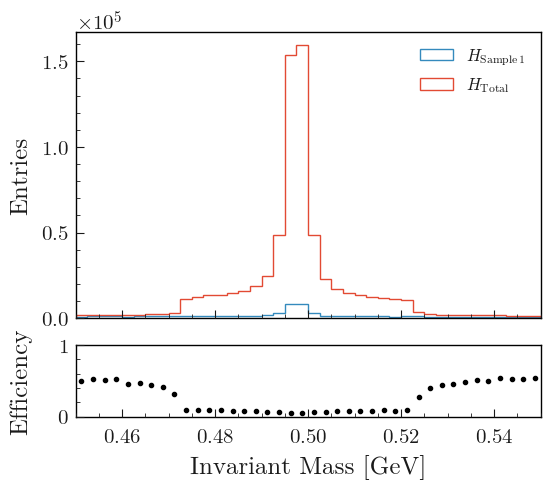

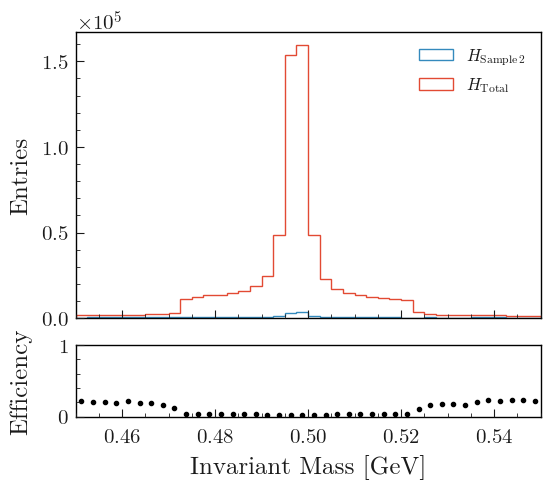

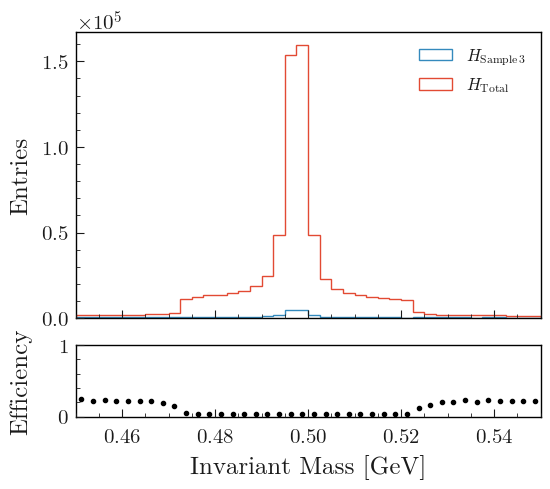

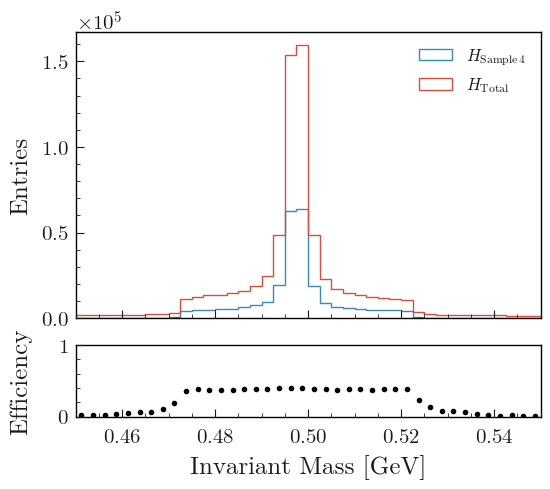

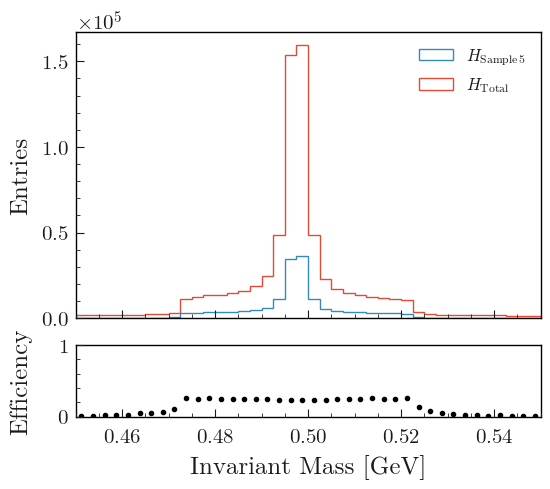

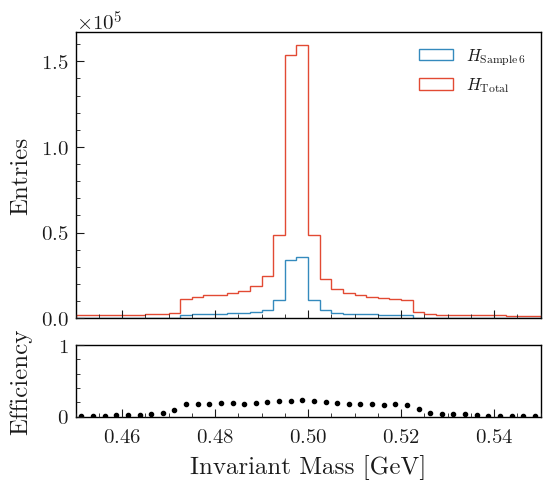

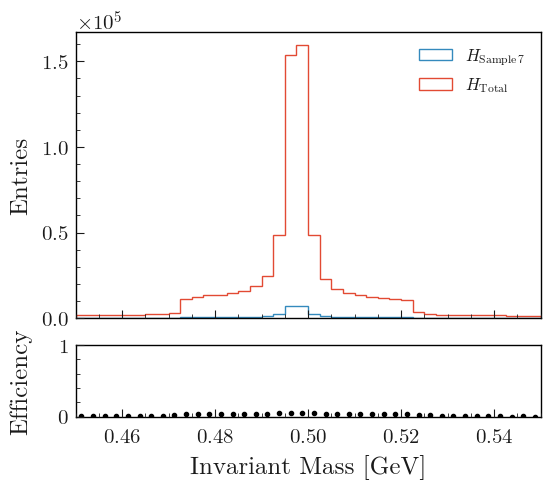

In [36]:
import plothist as ph

# Make histograms for each component
hs = [ph.make_hist(data["K0S_InvM"], bins=40, range=(0.45, 0.55)) for data in datasmc_old]
ht = [ph.make_hist(data["K0S_InvM"], bins=40, range=(0.45, 0.55)) for data in datasmc]

# Combine all into one total histogram
H_total = sum(hs + ht)

# Now compare each component to the total
for i, h in enumerate(hs + ht):
    fig, ax_main, ax_comparison = ph.plot_two_hist_comparison(
        h,
        H_total,
        xlabel='Invariant Mass [GeV]',
        ylabel='Entries',
        h1_label=rf"$\mathit{{H}}_{{\mathrm{{Sample}}\,{i+1}}}$",
        h2_label=r"$\mathit{H}_{\mathrm{Total}}$",
        comparison="efficiency",
    )
